# Taller

Responder las preguntas de analítica acerca de la base de datos de IMDB que se encuentran a lo largo de este documento. Modifique el nombre de este archivo por el número de su documento (123456789.ipynb) y adjúntelo como parte de los entregables del taller.

Nombre: 



### Descargar los datos:
- Tabla de películas
- Archivo .shp y archivos auxiliares con la información necesaria para pintar el mapa

Estos archivos quedarán en la carpeta _/content/IMDBAnalyticsData/_ asociada con el sistema operativo del servidor en el que se está ejecutando google colab. 

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr' -O data
!unzip "/content/data" -d "/content/IMDBAnalyticsData/"


--2023-03-03 01:00:42--  https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr
Resolving docs.google.com (docs.google.com)... 173.194.215.139, 173.194.215.101, 173.194.215.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6du3ieivkhfs2bi9mmfat0jr5uef8pa2/1677805200000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=d7ad33b9-ef1f-4b6a-a1e1-2f882de6788a [following]
--2023-03-03 01:00:46--  https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6du3ieivkhfs2bi9mmfat0jr5uef8pa2/1677805200000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=d7ad33b9-ef1f-4b6a-a1e1-2f882de6788a
Resolving doc-14-6c-docs.googleusercontent.com (doc-14-6c-docs.googleusercontent.com)... 142.250.98.132, 2607:f


### Importar las librerías necesarias

La libreia geopandas, que sirve para el procesamiento de archivos con información geográfica (shapefiles) no está instalada por defecto en el ambiente de google colab. Por esta razón, debe instalarla

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 20.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### Información básica de la tabla de películas

In [ ]:
df = pd.read_csv('IMDBAnalyticsData/Data/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**Pregunta 1**

Utilice histogramas para comparar la distribución de la columna _imdb_score_ relacionada con películas producidas en Francia y Canadá.

Para crear el histograma:

- Ajuste el número de _bins_ a 20
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

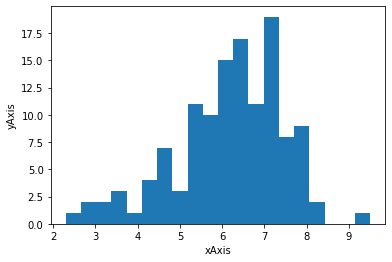

In [ ]:
#Espacio para el código de la pregunta 1
ax = df.loc[df['country'].isin(['Francia', 'Canada']), 'imdb_score']
plt.hist(ax, bins=20)
plt.xlabel("xAxis")
plt.ylabel("yAxis")
plt.show()

**Pregunta 2**

Cree un histograma para mirar la distribución de la columna _imdb_score_ de las películas producidas en blanco y negro.

Para crear el histograma:

- Ajuste el número de _bins_ a 10
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

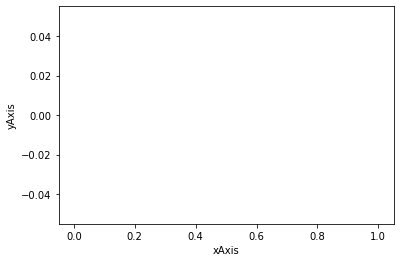

In [ ]:
#Espacio para el código de la pregunta 2
datos_seleccionados = df.loc[df["imdb_score"] == 'Black and White', "imdb_score"]
plt.hist(datos_seleccionados, bins=10)
plt.xlabel("xAxis")
plt.ylabel("yAxis")
plt.show()

**Pregunta 3**

¿Qué país tiene el mayor promedio de calificación de películas? Utilice figuras de barras para visualizar los resultados.  



el pais con mejores calificaciones en las peliculas es:  Canada


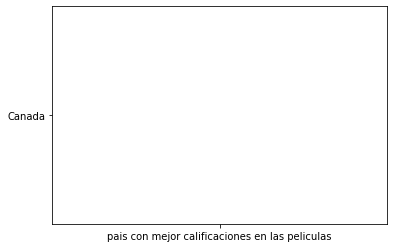

In [ ]:
indice_maximo = df["imdb_score"].idxmax()
maximo = df.loc[indice_maximo, "country"]
print("el pais con mejores calificaciones en las peliculas es: ",maximo)
datos = [maximo]
etiqueta = ["pais con mejor calificaciones en las peliculas"]
plt.bar(etiqueta,datos)
plt.show()


**Pregunta 4** 

¿Cuántas películas a blanco y negro y cuántas películas a color se tienen en la base de datos?


In [ ]:
#Espacio para el código de la pregunta 4
df_mbc = df.groupby('color').size().to_frame('# de peliculas a estilo de color')
df_mbc

,# de peliculas a estilo de color
color,
Black and White,209
Color,4815


**Pregunta 5**

¿Cuál película de Christopher Nolan tiene la mayor calificación (_imdb_score_)? Utilice figuras de barras para visualizar los resultados.

In [ ]:
#Espacio para el código de la pregunta 5
mask = df["director_name"] == "Christopher Nolan"
nolan_df = df.loc[mask, ["director_name", "imdb_score","duration","title_year"]]
max_imdb = nolan_df["imdb_score"].max()
max_imdb_row = nolan_df.loc[nolan_df["imdb_score"] == max_imdb]
print(max_imdb_row)


        director_name  imdb_score  duration  title_year
66  Christopher Nolan         9.0     152.0      2008.0


**Pregunta 6**

Utilice un _line chart_ para visualizar cuántas películas se produjeron en USA desde el 2010 hasta el 2015.

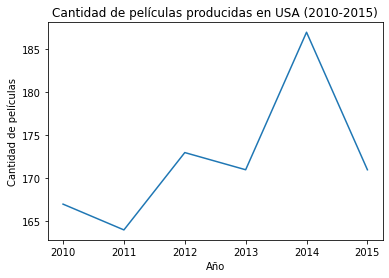

In [ ]:
#Espacio para el código de la pregunta 6
mask = (df["country"] == "USA") & (df["title_year"].between(2010, 2015))
usa_movies = df.loc[mask]
year_counts = usa_movies.groupby("title_year").size()
plt.plot(year_counts.index, year_counts.values)
plt.title("Cantidad de películas producidas en USA (2010-2015)")
plt.xlabel("Año")
plt.ylabel("Cantidad de películas")
plt.show()


**Pregunta 7**

Grafique en un mapa el _imdb_score_ promedio de las películas producidas en cada país.

In [ ]:
#Espacio para el código de la pregunta 7
shpfile = 'IMDBAnalyticsData/Data/Map/ne_10m_admin_0_countries.shp'
geo_df = gpd.read_file(shpfile)[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head(3)

,country,country_code,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


<AxesSubplot:>

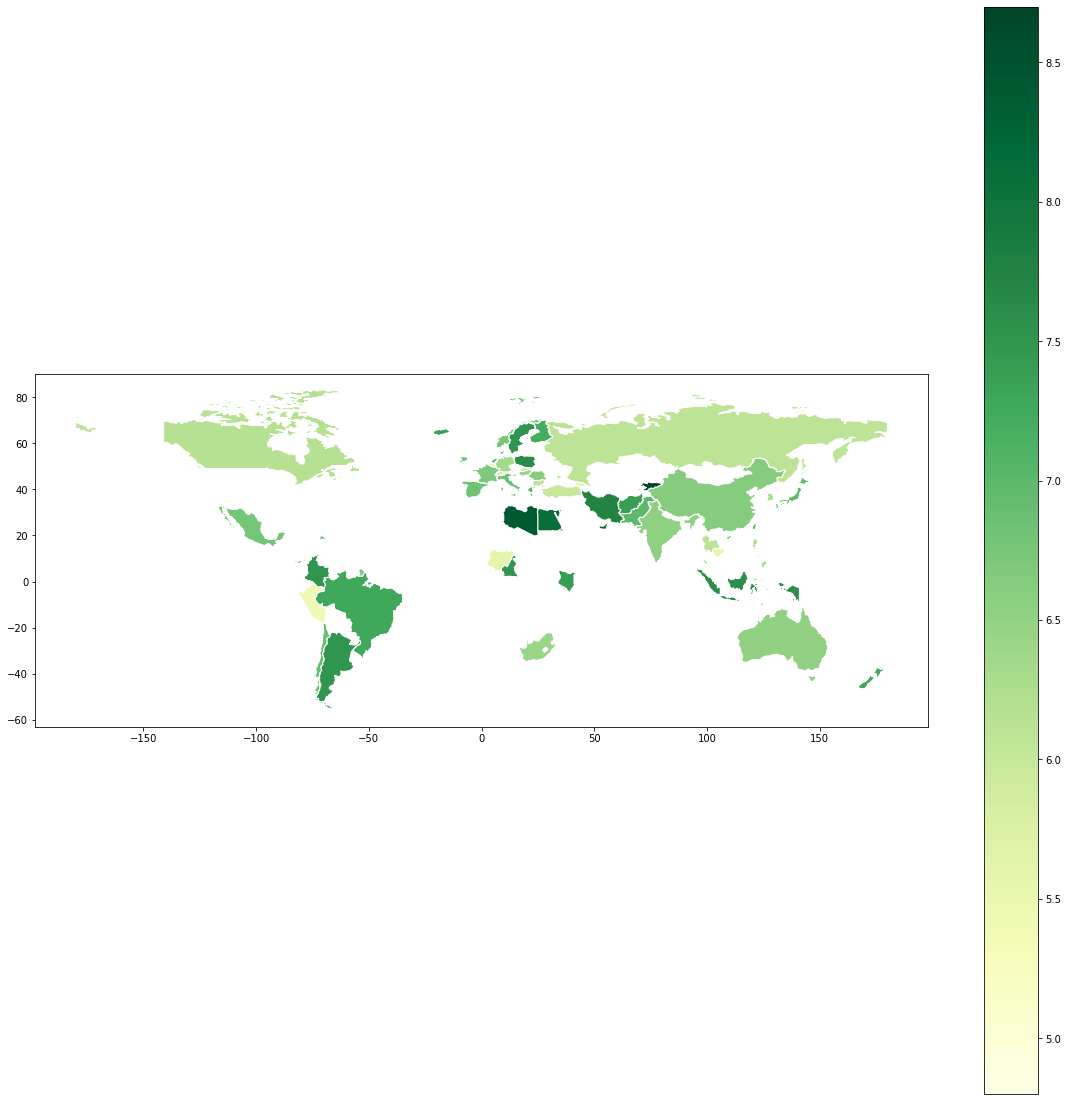

In [ ]:
avg_score_df = df.groupby('country')['imdb_score'].mean().reset_index()
avg_score_df.columns = ['country', 'avg_imdb_score']

# Combinar el GeoDataFrame con el DataFrame de imdb_score promedio
merged_df = geo_df.merge(avg_score_df, on='country', how='left')

# Graficar el mapa con el imdb_score promedio
merged_df.plot(column='avg_imdb_score', cmap='YlGn', figsize=(20, 20), edgecolor='white', linewidth=1, legend=True)


**Pregunta 8**

¿Qué información de su proyecto podría utilizar para hacer analítica de datos?


In [ ]:
#Mi proyecto es shoppyFAst y seria muy util usar estas librerias para analizar datos como:
#---Tipo de clientes que frecuentan la tienda
#---Que mercancia se vende mas
#---En caso de tener varias tiendas en que tienda se vende mas
#---Que tipo de producto se vende mas
#---cuanto han crecido o bajado las ventas en 2 fechas establecidas
#---Sacar reportes de cuantos productos de que tipo se vendieron y asi sacar informes de inventario
